## Pykep installing

Instructions here: https://esa.github.io/pykep/installation.html <br> Or, for python3 only: ```pip3 install pykep``` <br>

Docs: https://esa.github.io/pykep/documentation/index.html

In [1]:
import time
import matplotlib.pyplot as plt
import pykep as pk
from pykep.orbit_plots import plot_planet, plot_lambert
from pykep.planet import jpl_lp, tle
from pykep import lambert_problem, DAY2SEC, MU_SUN, epoch
import numpy as np
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##  Two-line element set

A two-line element set (TLE) is a data format encoding a list of orbital elements of an Earth-orbiting object for a given point in time, the epoch. Using suitable prediction formula, the state (position and velocity) at any point in the past or future can be estimated to some accuracy.

#### An example TLE for the International Space Station:

ISS (ZARYA)

1 25544U 98067A   08264.51782528 -.00002182  00000-0 -11606-4 0  2927

2 25544  51.6416 247.4627 0006703 130.5360 325.0288 15.72125391563537



Try to create satellite. 

In [2]:
help(tle)

Help on class tle in module pykep.planet._planet:

class tle(_base)
 |  An Earth satellite defined from the TLE format, derives from :py:class:`pykep.planet._base`
 |  
 |  Method resolution order:
 |      tle
 |      _base
 |      Boost.Python.instance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |  
 |  __deepcopy__(...)
 |  
 |  __getinitargs__(...)
 |  
 |  __getstate__(...)
 |  
 |  __init__(...)
 |      pykep.planet.tle(line1, line2)
 |      
 |      - line1: string containing the first line of a TLE (69 well formatted chars)
 |      - line2: string containing the second line of a TLE (69 well formatted chars)
 |      
 |      Example::
 |      
 |        line1 = '1 23177U 94040C   06175.45752052  .00000386  00000-0  76590-3 0    95'
 |        line2 = '2 23177   7.0496 179.8238 7258491 296.0482   8.3061  2.25906668 97438'
 |        arianne = planet.tle(line1, line2)
 |  
 |  __reduce__ = <unnamed Boost.Python function>(...)
 |  
 |  __setstate__(

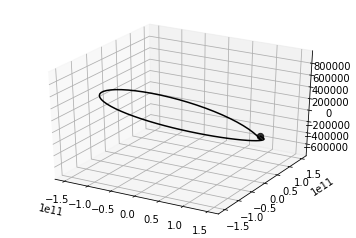

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

t = epoch(640)

earth = jpl_lp('earth')
plot_planet(earth, t0=t, ax=ax)

plt.show()

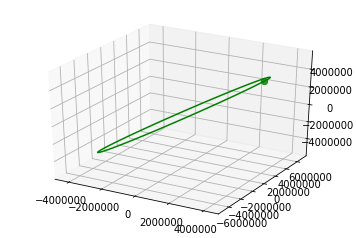

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

t = epoch(640)

iss1 = '1 25544U 98067A   17328.30743056  .00003472  00000-0  59488-4 0  9993'
iss2 = '2 25544  51.6407 320.0980 0004356 149.0109  38.9204 15.54217487 86654'
ISS = tle(iss1, iss2)

plot_planet(ISS, t0=t, ax=ax, color="g")

plt.show()

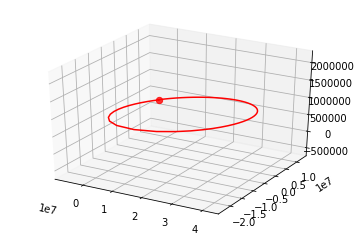

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

t = epoch(640)

line1 = '1 23177U 94040C   06175.45752052  .00000386  00000-0  76590-3 0    95'
line2 = '2 23177   7.0496 179.8238 7258491 296.0482   8.3061  2.25906668 97438'
arianne = tle(line1, line2)

plot_planet(arianne, t0=t, ax=ax, color="r")

plt.show()

### We need:
    - convert (position, velocity, time) to TLE to initiate SpaceObject.
    - to be able to convert TLE to (x, y, z) - can use .eph(epoch) method
    - to calculate the position of satellite at some epoch. - also use eph(epoch)
    - add this to simulator, update SpaceObject class.
    

In [6]:
help(ISS.eph)

Help on method eph:

eph(...) method of pykep.planet._planet.tle instance
    pykep.planet._base.eph(when)
    
    - when: a :py:class:`pykep.epoch` indicating the epoch at which the ephemerides are needed, it can also be a double in which case its interpreted as a mjd2000
    
    Retuns a tuple containing the planet position and velocity in SI units
    
    .. note::
    
       This is a pure virtual method and must be reimplemented in the derived class
    
    Example::
    
      r,v = earth.eph(epoch(5433), 'mjd2000')
      r,v = earth.eph(5433)



In [7]:
eph = pk.epoch(6540)
pos, v = ISS.eph(eph)
print("ISS position: x - {:0.2f}, y - {:0.2f}, z - {:0.2f}.\
      \nISS velocity: Vx - {:0.2f}, Vy - {:0.2f}, Vz - {:0.2f}\
      \nEpoch: {}".format(
                    pos[0], pos[1], pos[2], 
                    v[0], v[1], v[2], 
                    eph)
     )

ISS position: x - -1246420.70, y - 5863791.87, z - 3159016.80.      
ISS velocity: Vx - -5796.63, Vy - 1380.96, Vz - -4836.30      
Epoch: 2017-Nov-27 00:00:00


In [8]:
help(epoch)

Help on class epoch in module pykep.core._core:

class epoch(Boost.Python.instance)
 |  Represents a precise point in time. The boost::posix_time_ptime classes are used to handle the conversion to and from string
 |  
 |  Method resolution order:
 |      epoch
 |      Boost.Python.instance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getinitargs__(...)
 |  
 |  __getstate__(...)
 |  
 |  __init__ = _epoch_ctor(self, julian_date=0, julian_date_type='mjd2000')
 |      pykep.epoch(julian_date=0, julian_date_type="mjd2000")
 |      
 |      - julian_date: a julian date, defaults to 0
 |      - julian_date_type: julian date type, one of "jd", "mjd" and "mjd2000", defaults to "mjd2000"
 |      
 |      Examples::
 |      
 |        e1 = epoch(0)
 |        e1 = epoch(0,"mjd2000")
 |        e2 = epoch(54333, "mjd")
 |  
 |  __reduce__ = <unnamed Boost.Python function>(...)
 |  
 |  __repr__(...)
 |  
 |  __setstate__(...)
 |  
 |  ------------------------------------------

In [9]:
print("Data: {}\nJulian Date: {}\nModified Julian Date{}\nModifeid Julian Date 2000: {}".format(eph, eph.jd, eph.mjd, eph.mjd2000))

Data: 2017-Nov-27 00:00:00
Julian Date: 2458084.5
Modified Julian Date58084.0
Modifeid Julian Date 2000: 6540.0


To create an epoch type from normal date - we can use ***pykep.epoch_from_string()*** or ***pykep.epoch_from_iso_string()***

In [10]:
help(pk.epoch_from_string)

Help on built-in function epoch_from_string in module pykep.core._core:

epoch_from_string(...)
    pykep.epoch_from_string(s)
    
    - s: string containing a date in the format 'YYYY-MM-DD HH:MM:SS'Returns a :py:class:`pykep.epoch` object constructed from a from a delimited string containing a date.Excess digits in fractional seconds will be dropped. Ex: '1:02:03.123456999' => '1:02:03.123456'.This behavior depends on the precision defined in astro_constant.h used to compile.
    
    NOTE: The function is based on the corresponding `boost date_time library function <http://www.boost.org/doc/libs/1_44_0/doc/html/date_time/posix_time.html#ptime_from_string>`_
    
    Example::
    
      e = pykep.epoch_from_string('2002-01-20 23:59:54.003')



In [11]:
t = time.strftime("%Y-%m-%d %T")
print("Current time in YYYY-MM-DD HH:MM:SS format: {}".format(t))
curr_eph = pk.epoch_from_string(t)
print(curr_eph)

Current time in YYYY-MM-DD HH:MM:SS format: 2017-11-27 13:22:04
2017-Nov-27 13:22:03


In [12]:
help(pk.epoch_from_iso_string)

Help on built-in function epoch_from_iso_string in module pykep.core._core:

epoch_from_iso_string(...)
    pykep.epoch_from_iso_string(s)
    
    - s: string containing a date in the iso format 'YYYYMMDDTHHMMSS'Returns a :py:class:`pykep.epoch` object constructed from a from a non delimited iso form string containing a date.
    
    NOTE: The function is based on the corresponding `boost date_time library function <http://www.boost.org/doc/libs/1_44_0/doc/html/date_time/posix_time.html#ptime_from_string>`_
    
    Example::
    
      e = pykep.epoch_from_iso_string('20020120T235954')



In [13]:
t = time.strftime("%Y%m%dT%H%M%S")
print("Current time in YYYYMMDDTHHMMSS format: {}".format(t))
curr_eph = pk.epoch_from_iso_string(t)
print(curr_eph)

Current time in YYYYMMDDTHHMMSS format: 20171127T132204
2017-Nov-27 13:22:03


In [14]:
pk.epoch(1, "mjd2000")

2000-Jan-02 00:00:00

**Вопросы**:
1. Как опредляются у нас параметры x, y, z (отностиельно земли?), и как это соотносится с тем, что возвразает `tle.eph(epoch)`
2. Как преобразовать (pos, v, t) в TLE формат. -- **можем использовать не pk.planet.tle, а pk.planet.keplerian**
3. 

### Initiate a satellite with position (cartesian), velocity, epoch.

ECEF ("earth-centered, earth-fixed"), also known as ECR ("earth-centered rotational"), is a geographic coordinate system and Cartesian coordinate system, and is sometimes known as a "conventional terrestrial" system. It represents positions (in meters) as X, Y, and Z coordinates. The point (0,0,0) is defined as the center of mass of the earth, hence the name "earth-centered." Its axes are aligned with the international reference pole (IRP) and international reference meridian (IRM) that are fixed with respect to the surface of the earth, hence the description "earth-fixed." This term can cause confusion since the earth does not rotate about the z-axis (unlike an inertial system such as ECI), and is therefore alternatively called ECR.

The z-axis extends through True north, which does not coincide with the instantaneous earth rotational axis. The slight "wobbling" of the rotational axis is known as polar motion. The x-axis intersects the sphere of the earth at 0° latitude (the equator) and 0° longitude (prime meridian in Greenwich). This means that ECEF rotates with the earth, and therefore coordinates of a point fixed on the surface of the earth do not change. Conversion from a WGS84 datum to ECEF can be used as an intermediate step in converting velocities to the north east down coordinate system.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/ECEF.svg/1200px-ECEF.svg.png">


https://en.wikipedia.org/wiki/ECEF

In [15]:
help(pk.propagate_lagrangian)

Help on built-in function propagate_lagrangian in module pykep.core._core:

propagate_lagrangian(...)
    pykep.propagate_lagrangian(r,v,t,mu)
    
    - r: start position, x,y,z
    - v: start velocity, vx,vy,vz
    - t: propagation time
    - mu: central body gravity constant
    
    Returns a tuple containing r and v, the final position and velocity after the propagation.
    
    Example::
    
      r,v = propagate_lagrangian([1,0,0],[0,1,0],pi/2,1)



In [16]:
import math
r,v = pk.propagate_lagrangian([1,0,0],[0,1,0],math.pi/2,1)
print(r, v)

(1.1102230246251565e-16, 1.0, 0.0) (-1.0, 1.1102230246251565e-16, 0.0)


In [17]:
l = pk.lambert_problem([1,0,0],[0,1,0],5 * math.pi / 2. )
l

Lambert's problem:
mu = 1
r1 = [1, 0, 0]
r2 = [0, 1, 0]
Time of flight: 7.8539816339745

chord = 1.4142135623731
semiperimeter = 1.7071067811865
lambda = 0.41421356237309
non dimensional time of flight = 4.9798223260205

Maximum number of revolutions: 1
Solutions: 
0 revs, Iters: 3, x: -0.58644325543794, a: 1.3009812610796
	v1= [0.90230487720848529, 0.64590659483860502, 0] v2= [-0.64590659483860502, -0.90230487720848529, 0]
1 revs,  left. Iters: 4, x: -0.11188837995933, a: 0.86437450327173
	v1= [0.4521333366855077, 0.79916800651739373, 0] v2= [-0.79916800651739373, -0.4521333366855077, 0]
1 revs, right. Iters: 4, a: 0.38268343236509, a: 1
	v1= [0, 1, 0] v2= [-1, 0, 0]

In [18]:
E = pk.ic2eq(r = [1,0,0], v = [0,1,0], mu =1.0)
help(pk.ic2eq)

Help on built-in function ic2eq in module pykep.core._core:

ic2eq(...)
    pykep.ic2eq(r,v,mu = 1.0, retrogade = False)
    
    - r: position (cartesian)
    - v: velocity (cartesian)
    - mu: gravity parameter
    
    - retrogade: uses the retrograde parameters. Default value is False.
    
    Returns the modified equinoctial elements a(1-e^2),h,k,p,q,L
    L is the true mean longitude
    Example:: 
    
      E = ic2eq(r = [1,0,0], v = [0,1,0], mu =1.0)



In [19]:
help(pk.planet.keplerian)

Help on class keplerian in module pykep.planet._planet:

class keplerian(_base)
 |  A planet with Keplerian ephemerides, derives from :py:class:`pykep.planet._base`
 |  
 |  Method resolution order:
 |      keplerian
 |      _base
 |      Boost.Python.instance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |  
 |  __deepcopy__(...)
 |  
 |  __getinitargs__(...)
 |  
 |  __getstate__(...)
 |  
 |  __init__ = _keplerian_ctor(self, *args)
 |      pykep.planet.keplerian(when,orbital_elements, mu_central_body, mu_self,radius, safe_radius [, name = 'unknown'])
 |      
 |      pykep.planet.keplerian(when,r,v, mu_central_body, mu_self,radius, safe_radius [, name = 'unknown'])
 |      
 |      - when: a :py:class:`pykep.epoch` indicating the orbital elements reference epoch
 |      - orbital_elements: a sequence of six containing a,e,i,W,w,M (SI units, i.e. meters and radiants)
 |      - r,v: position and velocity of an object at when (SI units)
 |      - mu_cen

In [20]:
t = 6541
pos = [1,0,0]
v = [0,1,0]
mu =1.0
eph = pk.epoch(t, "mjd2000")
E = pk.ic2eq(r = [1,0,0], v = [0,1,0], mu =1.0)
# initiate with orbital elements
sat = pk.planet.keplerian(eph, E)
# initiate with pos and v 
# s2 = pk.planet.keplerian(eph, r, v, mu, mu, mu) - not working!

In [21]:
sat

Planet Name: Unknown
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 0.10000000000000001
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 6.6845871226705987e-12
Eccentricity: 0
Inclination (deg.): 0
Big Omega (deg.): 0
Small omega (deg.): -0
Mean anomaly (deg.): 0
Elements reference epoch: 2017-Nov-28 00:00:00
Ephemerides type: Keplerian
r at ref. = [1, 0, 0]
v at ref. = [0, 0.31622776601683794, 0]

In [22]:
dir(sat)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getstate__',
 '__getstate_manages_dict__',
 '__gt__',
 '__hash__',
 '__init__',
 '__instance_size__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_orig_init',
 'compute_period',
 'eph',
 'human_readable_extra',
 'mu_central_body',
 'mu_self',
 'name',
 'orbital_elements',
 'osculating_elements',
 'radius',
 'ref_epoch',
 'ref_mjd2000',
 'safe_radius']

In [23]:
eph = epoch(7000, "mjd2000")
pos, v = sat.eph(eph)
print("Position at epoch {}: {}\nVelocity at epoch {}: {}".format(eph, pos, eph, v))

Position at epoch 2019-Mar-02 00:00:00: (0.07504426809074016, -0.9971802032866103, 0.0)
Velocity at epoch 2019-Mar-02 00:00:00: (0.31533606800154107, 0.02373108125070344, 0.0)


In [24]:
sat.name = "D1"

## Example of simulator

In [25]:
from simulator import Simulator, read_tle_satellites
from api import SpaceObject, Agent, Environment

In [26]:
sattelites = read_tle_satellites("stations.txt")
sattelites[0].satellite

Planet Name: ISS (ZARYA)
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Ephemerides type: SGP4 propagator
TLE epoch: 2017-Nov-26 17:09:01.999850
TLE 1: 1 25544U 98067A   17330.71460648  .00003549  00000-0  60599-4 0  9994
TLE 2: 2 25544  51.6430 308.0962 0004156 155.1593 190.3808 15.54237585 87025

In [27]:
ISS, debris = sattelites[0], sattelites[1:4]
# Example of SpaceObject with initial parameters: pos, v, epoch.
pos, v = [2315921.25, 3814078.37, 5096751.46], [4363.18, 1981.83, 5982.45]
epoch = pk.epoch_from_string("2017-Nov-27 15:16:20")
mu, f = 398600800000000, 1.0
d1 = SpaceObject("Debris 1", False, dict(
    pos=pos, v=v, epoch=epoch, mu=mu, f=f))
debris.append(d1)

agent = Agent()
env = Environment(ISS, debris)

simulator = Simulator(agent, env)

In [28]:
simulator.run(N=5, vizualize=False)

Iter #1 	Epoch: 2017-Nov-27 13:22:03	Collision: False
ISS (ZARYA) position: x - 4813621.39, y - -4347264.77, z - 1984103.09.      
ISS (ZARYA) velocity: Vx - 2060.40, Vy - 4842.55, Vz - 5577.64      

TIANGONG 1 position: x - -4862982.27, y - -799689.28, z - -4506341.23.      
TIANGONG 1 velocity: Vx - 738.72, Vy - -7666.43, Vz - 543.40      

AGGIESAT 4 position: x - 4228762.17, y - 5073980.47, z - 1017884.40.      
AGGIESAT 4 velocity: Vx - -3132.95, Vy - 3817.45, Vz - -5943.47      

FLOCK 2E'-1 position: x - -4111376.50, y - -3195221.14, z - -4237447.42.      
FLOCK 2E'-1 velocity: Vx - 1483.22, Vy - -6653.61, Vz - 3583.07      

Debris 1 position: x - -837060.25, y - -892090.12, z - 847906.93.      
Debris 1 velocity: Vx - 0.00, Vy - -0.00, Vz - -0.00      

Iter #2 	Epoch: 2017-Nov-27 13:23:30.400000	Collision: False
ISS (ZARYA) position: x - 4968405.55, y - -3908806.07, z - 2455754.99.      
ISS (ZARYA) velocity: Vx - 1519.72, Vy - 5298.89, Vz - 5331.53      

TIANGONG 1 positio